# Example : Predicting teacher's mood

**Problem statement :**

In the context of predicting a teacher's mood, the goal is to leverage HMMs to forecast the teacher's emotional state based on the observed t-shirt colors worn on consecutive days.

### Step 1: Import the required libraries

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.4 MB/s eta 0:00:00


In [1]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

### Step 2: Define the model parameters

In [2]:
# Define the state space
states = ["Happy", "Sad"]
n_states = len(states)
print('Number of hidden states :',n_states)

# Define the observation space
observations = ["Red", "Green", "Blue"]
n_observations = len(observations)
print('Number of observations :',n_observations)

Number of hidden states : 2
Number of observations : 3


In [3]:
# Define the initial state distribution
state_probability = np.array([0.4, 0.6])
print("State probability: ", state_probability)

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
								                   [0.5, 0.5]])
print("\nTransition probability:\n", transition_probability)

# Define the observation likelihoods
emission_probability= np.array([[0.8, 0.1, 0.1],
								                [0.2, 0.3, 0.5]])
print("\nEmission probability:\n", emission_probability)

State probability:  [0.4 0.6]

Transition probability:
 [[0.7 0.3]
 [0.5 0.5]]

Emission probability:
 [[0.8 0.1 0.1]
 [0.2 0.3 0.5]]


### Step 3: Create an instance of the HMM model and Set the model parameters

In [4]:
model = hmm.CategoricalHMM(n_components=n_states, n_features=n_observations, algorithm='viterbi')
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

### Step 4: Define an observation sequence

In [5]:
# Define the sequence of observations
observations_sequence = np.array([1, 2, 0, 1]).reshape(-1, 1) # ["Green", "Blue", "Red", "Green"]
observations_sequence

array([[1],
       [2],
       [0],
       [1]])

### Step 5: Predict the most likely sequence of hidden states

In [6]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", [states[i] for i in hidden_states])

Most likely hidden states: ['Sad', 'Sad', 'Happy', 'Sad']


### Step 6: Decode the observation sequence

In [7]:
#the same result as predict but with the Log probability also
log_probability, hidden_states = model.decode(observations_sequence,
											                        lengths = len(observations_sequence),
											                        algorithm ='viterbi' ) # Decoding using the Viterbi algorithme

print('Log Probability :', log_probability)
print("Most likely hidden states:", [states[i] for i in hidden_states])

Log Probability : -6.425329129737845
Most likely hidden states: ['Sad', 'Sad', 'Happy', 'Sad']


### Step 7: Plot the results

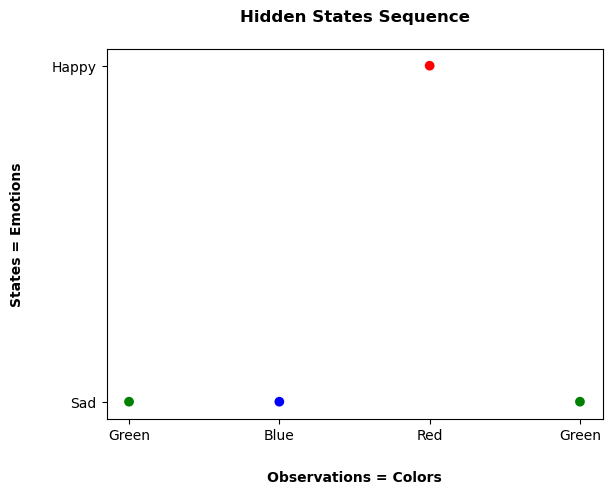

In [8]:
# Define a mapping between numeric observations and emotions / colors
emotion_mapping = {0: 'Happy', 1: 'Sad'}
color_mapping = {0: 'Red', 1: 'Green', 2: 'Blue'}

# Map numeric observations to corresponding emotions / colors
emotions = [emotion_mapping[state] for state in hidden_states]
colors = [color_mapping[obs] for obs in observations_sequence.flatten()]

# Plot the results
plt.scatter(range(len(hidden_states)), emotions, c=colors, marker='o')
plt.xticks(range(len(hidden_states)), colors)
plt.xlabel('Observations = Colors', labelpad=20, weight='bold')
plt.ylabel('States = Emotions', labelpad=20, weight='bold')
plt.title("Hidden States Sequence", pad=20, weight='bold')
plt.show()